In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving student-mat.csv to student-mat.csv


In [ ]:
data = pd.read_csv("student-mat.csv", sep=';')


In [ ]:
print(data.shape)
print(data.columns)

(395, 33)
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [ ]:
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [ ]:
print("Before preprocessing:")
print(data.info())
print("\nMissing values:\n", data.isnull().sum())

Before preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    

In [ ]:
label_cols = [
    'school', 'sex', 'address', 'famsize', 'Pstatus',
    'Mjob', 'Fjob', 'reason', 'guardian',
    'schoolsup', 'famsup', 'paid', 'activities',
    'nursery', 'higher', 'internet', 'romantic'
]


In [ ]:
label_cols

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [ ]:
le= LabelEncoder()
for col in label_cols:
  data[col]=le.fit_transform(data[col])

In [ ]:
scaler = StandardScaler()


In [ ]:
scale_cols = [
    'age', 'Medu', 'Fedu', 'traveltime', 'studytime',
    'failures', 'famrel', 'freetime', 'goout',
    'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'
]


In [ ]:
scale_cols

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [ ]:
data[scale_cols] = scaler.fit_transform(data[scale_cols])


In [ ]:
print("\nAfter preprocessing:")
print(data.head())


After preprocessing:
   school  sex       age  address  famsize  Pstatus      Medu      Fedu  Mjob  \
0       0    0  1.023046        1        0        0  1.143856  1.360371     0   
1       0    0  0.238380        1        0        1 -1.600009 -1.399970     0   
2       0    0 -1.330954        1        1        1 -1.600009 -1.399970     0   
3       0    0 -1.330954        1        0        1  1.143856 -0.479857     1   
4       0    0 -0.546287        1        0        1  0.229234  0.440257     2   

   Fjob  ...    famrel  freetime     goout      Dalc      Walc    health  \
0     4  ...  0.062194 -0.236010  0.801479 -0.540699 -1.003789 -0.399289   
1     2  ...  1.178860 -0.236010 -0.097908 -0.540699 -1.003789 -0.399289   
2     2  ...  0.062194 -0.236010 -0.997295  0.583385  0.551100 -0.399289   
3     3  ... -1.054472 -1.238419 -0.997295 -0.540699 -1.003789  1.041070   
4     2  ...  0.062194 -0.236010 -0.997295 -0.540699 -0.226345  1.041070   

   absences        G1        G2   

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
X = data.drop(['G3'], axis=1)   # All columns except final marks
y = data['G3']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
# -------------------------------
# 5️⃣ Evaluate Performance
# -------------------------------
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print("--------------------------")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


Linear Regression Results:
--------------------------
Mean Absolute Error (MAE): 0.327
Root Mean Squared Error (RMSE): 0.490
R² Score: 0.755


In [ ]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nSample Predictions:")
print(results.head(10))


Sample Predictions:
       Actual  Predicted
78  -0.090739  -0.903407
371  0.346358   0.199257
248 -1.183483  -1.613472
55  -0.090739  -0.519693
390 -0.309288  -0.406372
223  0.564907   0.426574
42   1.657650   1.807316
234 -0.964934  -0.628218
316 -2.276226  -0.748957
116  0.783456   0.425080


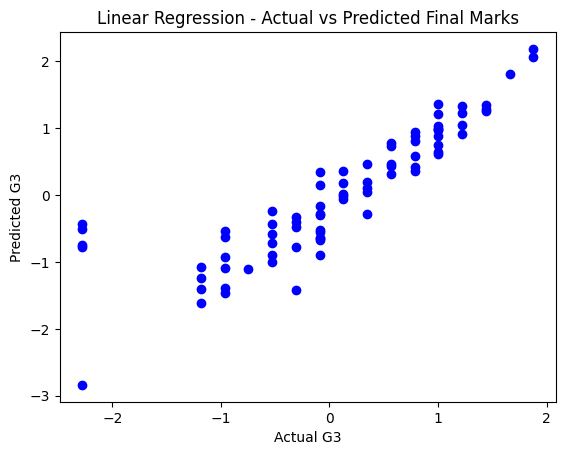

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Linear Regression - Actual vs Predicted Final Marks")
plt.show()


In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Agar y_pred probabilities hain (e.g. from sigmoid or model.predict_proba)
y_pred_classes = (y_pred > 0.5).astype(int)

# Ab binary labels mil gaye, inhe metrics mein use karo
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Precision: 1.0000
Recall: 0.6341
F1 Score: 0.7761


In [62]:
features = ['age', 'Medu', 'Fedu', 'studytime', 'failures',
            'absences', 'G1', 'G2', 'health', 'goout', 'freetime',
            'Dalc', 'Walc', 'famrel']  # Customize as needed

X = data[features]
y = data['Pass']

In [69]:
threshold = data['G3'].mean()
data['Pass'] = data['G3'].apply(lambda x: 1 if x >= threshold else 0)


In [70]:
y_pred_binary = (y_pred >= threshold).astype(int)


In [71]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)


In [72]:
from sklearn.model_selection import train_test_split

X = data[features]
y = data['Pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9493670886075949
Precision: 0.9302325581395349
Recall: 0.975609756097561

Confusion Matrix:
 [[35  3]
 [ 1 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.95        38
           1       0.93      0.98      0.95        41

    accuracy                           0.95        79
   macro avg       0.95      0.95      0.95        79
weighted avg       0.95      0.95      0.95        79



In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Agar y_pred probabilities hain (e.g. from sigmoid or model.predict_proba)
y_pred_classes = (y_pred > 0.1).astype(int)

# Ab binary labels mil gaye, inhe metrics mein use karo
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Precision: 0.9474
Recall: 0.8780
F1 Score: 0.9114


In [76]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Pass
0,0,0,1.023046,1,0,0,1.143856,1.360371,0,4,...,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,-1.782467,-1.254791,-0.964934,0
1,0,0,0.238380,1,0,1,-1.600009,-1.399970,0,2,...,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,-1.782467,-1.520979,-0.964934,0
2,0,0,-1.330954,1,1,1,-1.600009,-1.399970,0,2,...,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,-1.179147,-0.722415,-0.090739,0
3,0,0,-1.330954,1,0,1,1.143856,-0.479857,1,3,...,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.234133,0.874715,1.002004,1
4,0,0,-0.546287,1,0,1,0.229234,0.440257,2,2,...,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,-1.480807,-0.190038,-0.090739,0


In [79]:
data['pass_fail'] = data['G3'].apply(lambda x: 1 if x >= 10 else 0)

print("\nPass/Fail column added:")
print(data[['G3', 'pass_fail']].head())


Pass/Fail column added:
         G3  pass_fail
0 -0.964934          0
1 -0.964934          0
2 -0.090739          0
3  1.002004          0
4 -0.090739          0


In [81]:

X = data.drop(['pass_fail', 'G3'], axis=1)   # drop target & final grade
y = data['pass_fail']


In [82]:
_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [86]:
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [89]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Agar y_pred probabilities hain (e.g. from sigmoid or model.predict_proba)
y_pred_classes = (y_pred > 0.5).astype(int)

# Ab binary labels mil gaye, inhe metrics mein use karo
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
